In [ ]:
import pandas as pd

Data Reading

In [ ]:
datapath = "rentals.csv"
df = pd.read_csv(datapath)
print(df)

            id  latitude  longitude property_type        room_type  bathrooms  \
0          958  37.76931 -122.43386     Apartment  Entire home/apt        1.0   
1         3850  37.75402 -122.45805         House     Private room        1.0   
2         5858  37.74511 -122.42102     Apartment  Entire home/apt        1.0   
3         7918  37.76669 -122.45250     Apartment     Private room        4.0   
4         8142  37.76487 -122.45183     Apartment     Private room        4.0   
...        ...       ...        ...           ...              ...        ...   
8106  39342094  37.74010 -122.41196         House     Private room        2.0   
8107  39343373  37.77799 -122.42159   Condominium  Entire home/apt        1.0   
8108  39344101  37.73410 -122.38917           Hut     Private room        2.0   
8109  39350028  37.78144 -122.41207     Apartment  Entire home/apt        1.0   
8110  39354181  37.70707 -122.44812         House     Private room        1.0   

      bedrooms  minimum_nig

Data Cleaning

In [ ]:
#Check Data Types, Missing Values & Duplicates
df.duplicated()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8111 non-null   int64  
 1   latitude        8111 non-null   float64
 2   longitude       8111 non-null   float64
 3   property_type   8111 non-null   object 
 4   room_type       8111 non-null   object 
 5   bathrooms       8099 non-null   float64
 6   bedrooms        8107 non-null   float64
 7   minimum_nights  8111 non-null   int64  
 8   price           8111 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 570.4+ KB


,id,latitude,longitude,bathrooms,bedrooms,minimum_nights
count,8.111000e+03,8111.000000,8111.000000,8099.000000,8107.000000,8.111000e+03
mean,2.024561e+07,37.766054,-122.430107,1.395975,1.345874,1.234526e+04
std,1.228565e+07,0.022937,0.026967,0.923213,0.925298,1.110357e+06
min,9.580000e+02,37.704630,-122.513060,0.000000,0.000000,1.000000e+00
25%,8.905668e+06,37.751450,-122.442830,1.000000,1.000000,2.000000e+00
50%,2.161057e+07,37.769150,-122.424650,1.000000,1.000000,4.000000e+00
75%,3.120025e+07,37.785670,-122.410615,1.500000,2.000000,3.000000e+01
max,3.935418e+07,37.828790,-122.368570,14.000000,14.000000,1.000000e+08


In [ ]:
#Change Price Data Type
df['price'] = df['price'].str.replace('$','').str.replace(',', '').str.strip().astype(float)
print(df.dtypes)

id                  int64
latitude          float64
longitude         float64
property_type      object
room_type          object
bathrooms         float64
bedrooms          float64
minimum_nights      int64
price             float64
dtype: object


<ipython-input-27-cecb1e93b0e8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace('$','').str.replace(',', '').str.strip().astype(float)


In [ ]:
#Fill Missing Values of Bathrooms and Bedrooms with Median
df[['bathrooms', 'bedrooms']]=df[['bathrooms', 'bedrooms']].fillna(df[['bathrooms', 'bedrooms']].median())
print(df)
check = df.isna().sum()
print(check)

            id  latitude  longitude property_type        room_type  bathrooms  \
0          958  37.76931 -122.43386     Apartment  Entire home/apt        1.0   
1         3850  37.75402 -122.45805         House     Private room        1.0   
2         5858  37.74511 -122.42102     Apartment  Entire home/apt        1.0   
3         7918  37.76669 -122.45250     Apartment     Private room        4.0   
4         8142  37.76487 -122.45183     Apartment     Private room        4.0   
...        ...       ...        ...           ...              ...        ...   
8106  39342094  37.74010 -122.41196         House     Private room        2.0   
8107  39343373  37.77799 -122.42159   Condominium  Entire home/apt        1.0   
8108  39344101  37.73410 -122.38917           Hut     Private room        2.0   
8109  39350028  37.78144 -122.41207     Apartment  Entire home/apt        1.0   
8110  39354181  37.70707 -122.44812         House     Private room        1.0   

      bedrooms  minimum_nig

In [ ]:
#Remove Extreme Values of Minimum Nights
df_sorted = df.sort_values(by=['minimum_nights'], ascending=True)
print(df_sorted)
indices_to_drop = df[df['minimum_nights'] > 365].index
data_filtered = df.drop(indices_to_drop, inplace=True)

            id  latitude  longitude property_type        room_type  bathrooms  \
0          958  37.76931 -122.43386     Apartment  Entire home/apt        1.0   
3769  20408154  37.75747 -122.48785         House     Private room        1.5   
3773  20424542  37.74406 -122.45918   Guest suite  Entire home/apt        1.0   
3779  20439767  37.72271 -122.40442         House     Private room        1.0   
3781  20444584  37.73404 -122.47484         House  Entire home/apt        4.5   
...        ...       ...        ...           ...              ...        ...   
57       51374  37.76519 -122.45613     Apartment  Entire home/apt        1.0   
312     505763  37.75081 -122.44524     Apartment  Entire home/apt        1.0   
3664  19813606  37.79305 -122.42482   Condominium  Entire home/apt        1.0   
1893   8066789  37.76264 -122.42082     Apartment     Private room        2.0   
2912  15344978  37.75071 -122.42521     Apartment     Private room        1.0   

      bedrooms  minimum_nig

Data Summary After Cleaning

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8108 entries, 0 to 8110
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              8108 non-null   int64  
 1   latitude        8108 non-null   float64
 2   longitude       8108 non-null   float64
 3   property_type   8108 non-null   object 
 4   room_type       8108 non-null   object 
 5   bathrooms       8108 non-null   float64
 6   bedrooms        8108 non-null   float64
 7   minimum_nights  8108 non-null   int64  
 8   price           8108 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 633.4+ KB


,id,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,8.108000e+03,8108.000000,8108.000000,8108.000000,8108.000000,8108.000000,8108.000000
mean,2.024777e+07,37.766053,-122.430110,1.395412,1.345831,16.070054,225.068944
std,1.228706e+07,0.022938,0.026972,0.922781,0.925249,22.219623,410.998977
min,9.580000e+02,37.704630,-122.513060,0.000000,0.000000,1.000000,0.000000
25%,8.906478e+06,37.751450,-122.442833,1.000000,1.000000,2.000000,100.000000
50%,2.161180e+07,37.769155,-122.424645,1.000000,1.000000,4.000000,150.000000
75%,3.120736e+07,37.785670,-122.410610,1.500000,2.000000,30.000000,240.000000
max,3.935418e+07,37.828790,-122.368570,14.000000,14.000000,365.000000,10000.000000


Data Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Apartment         3241
House             2314
Condominium        891
Guest suite        577
Boutique hotel     267
Name: property_type, dtype: int64


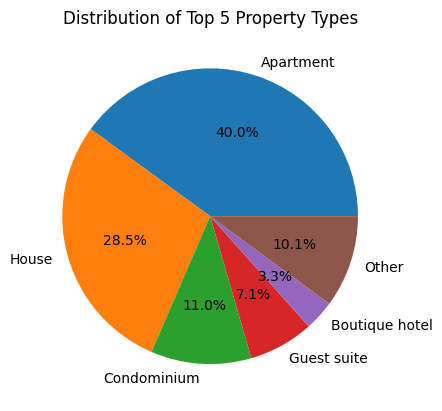

In [ ]:
#What are the most common property type?

top_5_property_types = df['property_type'].value_counts().head(5)
print(top_5_property_types)
other_count = df['property_type'].value_counts().sum() - top_5_property_types.sum()

# Create a list of property types
labels = list(top_5_property_types.index)
labels.append('Other')

# Create a list of property type counts
counts = list(top_5_property_types.values)
counts.append(other_count)

# Create a pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# Set the title
plt.title('Distribution of Top 5 Property Types')

# Display the pie chart
plt.show()


property_type
Camper/RV              20.000000
Hut                    69.000000
Hostel                 69.782609
Castle                101.000000
Dome house            135.000000
Cabin                 151.333333
In-law                155.000000
Bed and breakfast     155.372093
Aparthotel            159.317073
Guest suite           160.956672
Bungalow              169.764706
Tiny house            170.000000
Other                 173.500000
Apartment             203.739895
Guesthouse            204.658537
Cottage               219.583333
House                 224.442524
Serviced apartment    226.355372
Hotel                 265.490446
Condominium           273.364759
Loft                  277.863636
Townhouse             292.528169
Earth house           354.500000
Villa                 379.200000
Boutique hotel        460.460674
Resort                484.000000
Name: price, dtype: float64


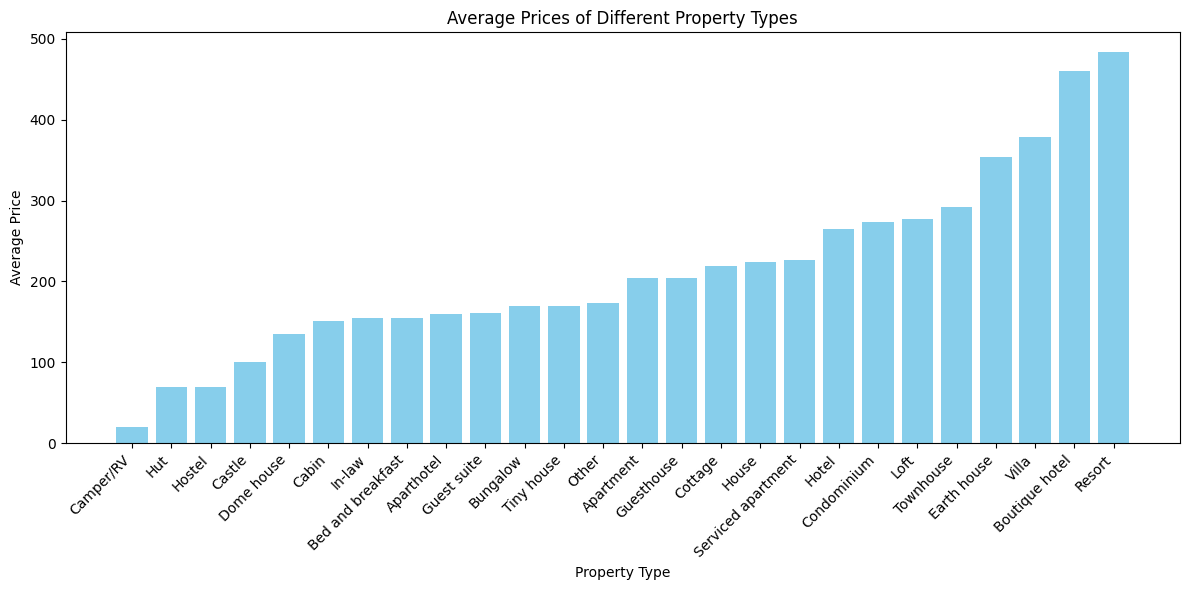

In [ ]:
#What are the different average prices based on property types?
average_price_by_property_type = df.groupby('property_type')['price'].mean()
average_price_by_property_type_sorted = average_price_by_property_type.sort_values()
print(average_price_by_property_type_sorted)

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(average_price_by_property_type_sorted.index, average_price_by_property_type_sorted, color='skyblue')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.title('Average Prices of Different Property Types')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,id,latitude,longitude,bathrooms,bedrooms,minimum_nights,price
count,8.108000e+03,8108.000000,8108.000000,8108.000000,8108.000000,8108.000000,8108.000000
mean,2.024777e+07,37.766053,-122.430110,1.395412,1.345831,16.070054,225.068944
std,1.228706e+07,0.022938,0.026972,0.922781,0.925249,22.219623,410.998977
min,9.580000e+02,37.704630,-122.513060,0.000000,0.000000,1.000000,0.000000
25%,8.906478e+06,37.751450,-122.442833,1.000000,1.000000,2.000000,100.000000
50%,2.161180e+07,37.769155,-122.424645,1.000000,1.000000,4.000000,150.000000
75%,3.120736e+07,37.785670,-122.410610,1.500000,2.000000,30.000000,240.000000
max,3.935418e+07,37.828790,-122.368570,14.000000,14.000000,365.000000,10000.000000


                 count        mean          std   min    25%    50%    75%  \
property_type                                                                
Apartment       3241.0  203.739895   302.511045  10.0  109.0  153.0  223.0   
Boutique hotel   267.0  460.460674  1574.639348  45.0  119.0  199.0  250.0   
Condominium      891.0  273.364759   288.457246   0.0  139.0  200.0  300.0   
Guest suite      577.0  160.956672    95.398233  39.0  110.0  140.0  185.0   
House           2314.0  224.442524   303.453749  28.0   80.0  130.0  260.0   

                    max  
property_type            
Apartment        9999.0  
Boutique hotel  10000.0  
Condominium      4500.0  
Guest suite      1200.0  
House            8000.0  


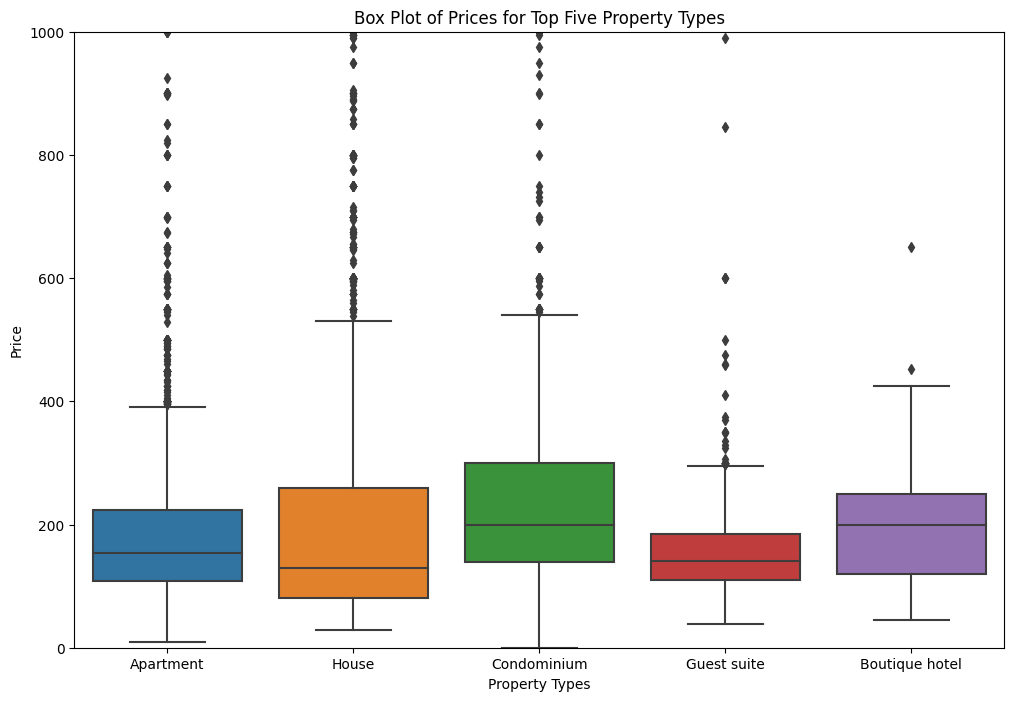

In [ ]:
#What are the price differences for the most five common property types?

df_subset = df[df['property_type'].isin(top_5_property_types.index)]
# Calculate quartiles
quartile_summary = df_subset.groupby('property_type')['price'].describe(percentiles=[.25, .5, .75])

# Print quartile information
print(quartile_summary)

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='property_type', y='price', data=df_subset, order=top_5_property_types.index)
plt.title('Box Plot of Prices for Top Five Property Types')
plt.xlabel('Property Types')
plt.ylabel('Price')

# Set y-axis limits
plt.ylim(0, 1000)
plt.show()

In [ ]:
#Drop ID, Latitude and Longitude
new_df = df.drop(['id', 'latitude', 'longitude'], axis=1, inplace=True)
print(new_df)

df.corr()

None


<ipython-input-36-3182324389de>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bathrooms,bedrooms,minimum_nights,price
bathrooms,1.000000,0.327917,0.030112,0.082173
bedrooms,0.327917,1.000000,-0.015416,0.263634
minimum_nights,0.030112,-0.015416,1.000000,-0.001205
price,0.082173,0.263634,-0.001205,1.000000


<ipython-input-37-009ab7f05fc9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_price = df.corr()['price'].drop('price', errors='ignore')


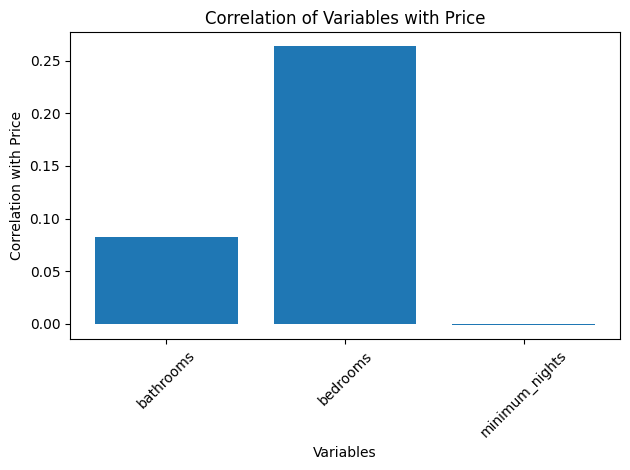

In [ ]:
#What factors (property types, minimum nights, etc.) have the most significant impact on pricing?

correlation_with_price = df.corr()['price'].drop('price', errors='ignore')


# Creating a bar graph
plt.bar(correlation_with_price.index, correlation_with_price.values)
plt.xlabel('Variables')
plt.ylabel('Correlation with Price')
plt.title('Correlation of Variables with Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


room_type
Shared room         80.933610
Private room       163.985116
Hotel room         179.710145
Entire home/apt    271.306016
Name: price, dtype: float64


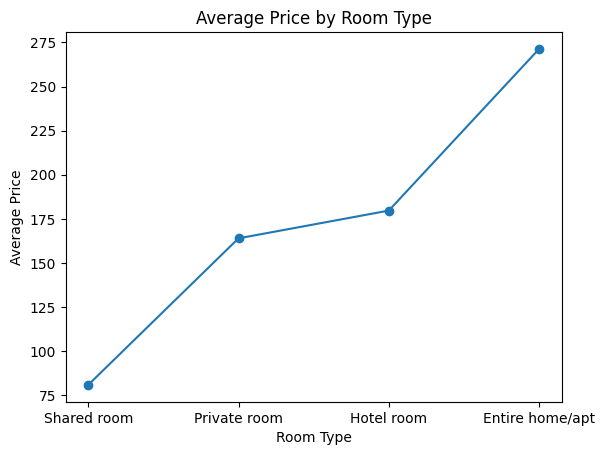

In [ ]:
#How do the prices differ based on room types?
avg_price_room_t = df.groupby('room_type')['price'].mean()
avg_price_by_avg_price_room_t_sorted = avg_price_room_t.sort_values()
print(avg_price_by_avg_price_room_t_sorted)

# Create a bar plot
plt.plot(avg_price_by_avg_price_room_t_sorted.index, avg_price_by_avg_price_room_t_sorted.values, marker='o')


# Set the x-axis label
plt.xlabel('Room Type')


# Set the y-axis label
plt.ylabel('Average Price')


# Set the title
plt.title('Average Price by Room Type')


# Display the bar plot
plt.show()


                price
bedrooms             
0.0        147.528103
1.0        169.111638
2.0        289.778533
3.0        415.226225
4.0        580.720207
5.0       1016.135135
6.0       1299.888889
7.0       1395.000000
8.0       1795.000000
14.0        69.000000


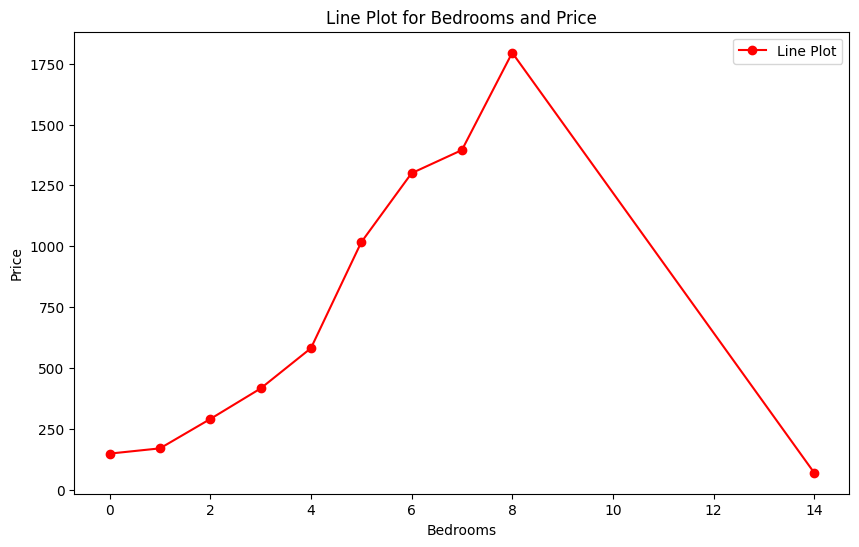

In [ ]:
#How do the prices differ based on number of bedrooms?
avg_price_bed = df.groupby('bedrooms')[['price']].mean()
avg_price_bed.sort_values(by = 'price')
print(avg_price_bed)
bedroom_values = avg_price_bed.index
average_prices = avg_price_bed['price']

plt.figure(figsize=(10, 6))

# Plotting the line graph
plt.plot(bedroom_values, average_prices, label='Line Plot', marker='o', linestyle='-', color='red')

# Adding labels and title
plt.title('Line Plot for Bedrooms and Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.legend()  # Show legend

# Show the plot
plt.show()

                 price
bathrooms             
0.0          71.078947
0.5          87.823529
1.0         190.573139
1.5         235.219344
2.0         319.926126
2.5         400.034188
3.0         423.570470
3.5         672.873016
4.0         254.163934
4.5        1082.428571
5.0         111.973451
6.0          53.111111
6.5          64.000000
7.0         199.000000
8.0          73.428571
10.0         87.000000
14.0         69.000000


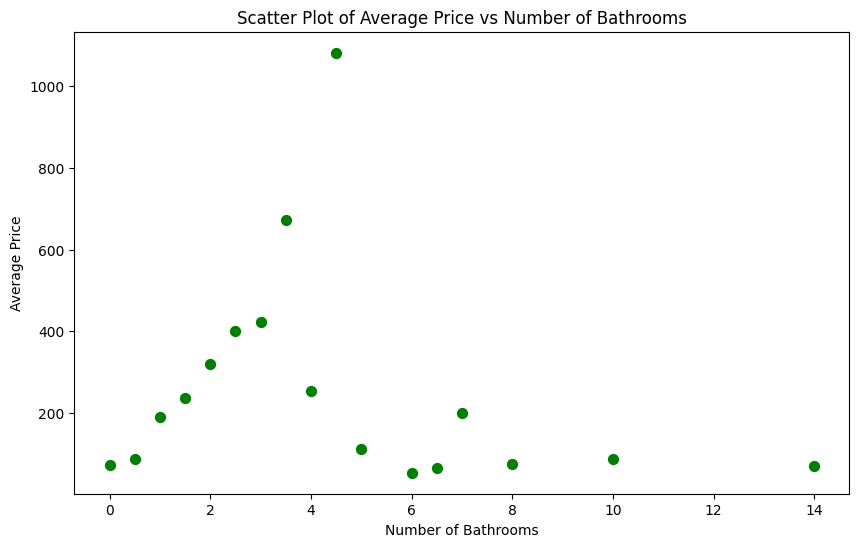

In [ ]:
#How do the prices differ based on number of bathrooms?
avg_price_bath = df.groupby('bathrooms')[['price']].mean()
avg_price_bath.sort_values(by = 'price')
print(avg_price_bath)
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_price_bath.index, avg_price_bath['price'], c='green', marker='o', s=50)

# Adding labels and title
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.title('Scatter Plot of Average Price vs Number of Bathrooms')

# Show the plot
plt.show()

    minimum_nights        price
0                1   246.172148
1                2   231.381198
2                3   285.851680
3                4   384.978261
4                5   312.578704
5                6   412.611111
6                7   253.067568
7                8   575.000000
8                9   282.000000
9               10   333.500000
10              11   560.000000
11              12   145.000000
12              13    85.750000
13              14   219.100000
14              15   150.000000
15              16   180.000000
16              18   238.500000
17              21   264.250000
18              25   501.000000
19              28    99.000000
20              29   130.500000
21              30   171.939144
22              31   169.991304
23              32    66.783333
24              33    65.000000
25              38   150.000000
26              40    87.500000
27              45    95.000000
28              50   140.000000
29              55   130.000000
30      

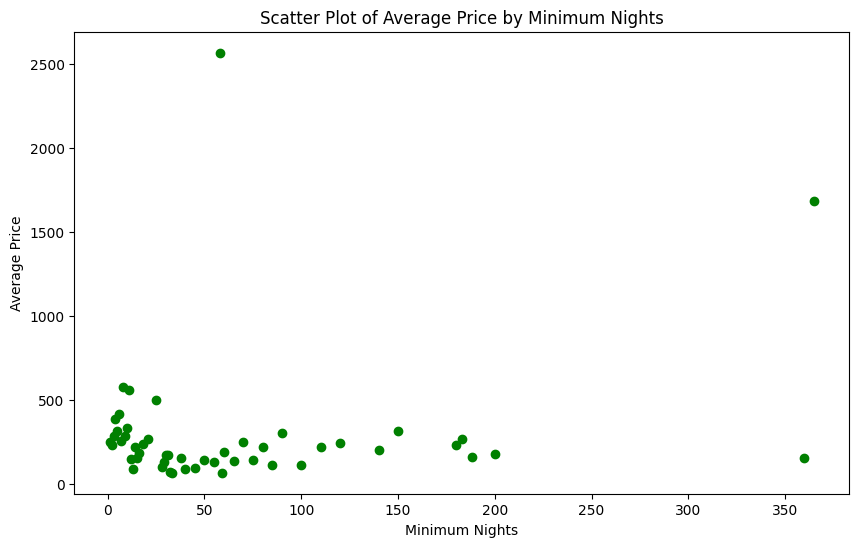

In [ ]:
#How do the prices differ based on minimum nights?
avg_price_minimum_nights = df.groupby('minimum_nights')['price'].mean()
avg_price_minimum_nights = avg_price_minimum_nights.reset_index()  # Reset index to have 'minimum_nights' as a column
avg_price_minimum_nights = avg_price_minimum_nights.sort_values(by='minimum_nights', ascending=True)
print(avg_price_minimum_nights)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(avg_price_minimum_nights['minimum_nights'], avg_price_minimum_nights['price'], color='green', marker='o')
plt.title('Scatter Plot of Average Price by Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Average Price')
plt.show()